<a href="https://colab.research.google.com/github/tibayo1/DL-Lung-Sounds/blob/master/Lung_Sounds_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json

# read file
with open('/content/kaggle (1).json', 'r') as myfile:
    data=myfile.read()
# parse file
obj = json.loads(data)
#get username and key
kaggle_key = str(obj['key'])
kaggle_username = str(obj['username'])


In [2]:
import os

# parse file
obj = json.loads(data)

os.environ['KAGGLE_USERNAME'] = kaggle_username # username from the json file
os.environ['KAGGLE_KEY'] = kaggle_key # key from the json file
!kaggle datasets download -d "vbookshelf/respiratory-sound-database" # api copied from kaggle



100% 3.69G/3.69G [01:08<00:00, 24.7MB/s]
100% 3.69G/3.69G [01:08<00:00, 58.0MB/s]


In [0]:
#unzip the folder downloaded from kaggle
!unzip 'respiratory-sound-database.zip'

In [0]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display
import pandas as pd

#to play audio
import IPython.display as ipd


In [5]:
os.listdir("/content/respiratory_sound_database/Respiratory_Sound_Database")

['patient_diagnosis.csv',
 'filename_format.txt',
 'audio_and_txt_files',
 'filename_differences.txt']

In [6]:
path = \
'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.txt'

col_names = ['Beginning_of_respiratory_cycle', 'End_of_respiratory_cycle', 'Presence/absence_of_crackles', 'Presence/absence_of_wheezes']

# Respiratory cycle column values are in 'seconds'.
# Presence = 1
# Absence = 0

df_annot = pd.read_csv(path, sep="\t", header=None, names=col_names)

df_annot.head(10)

,Beginning_of_respiratory_cycle,End_of_respiratory_cycle,Presence/absence_of_crackles,Presence/absence_of_wheezes
0,1.330,3.804,0,0
1,3.804,6.396,0,0
2,6.396,8.938,1,0
3,8.938,11.580,1,0
4,11.580,14.072,1,0
5,14.072,17.049,1,0
6,17.049,19.490,1,0


In [7]:
! pip install pysoundfile

In [0]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rmse,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [10]:
path = \
"/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/"
os.chdir(path)
wav_file = []
import glob
wav_file_2 = glob.glob("*.wav")
for file in wav_file_2:

['135_2b3_Tc_mc_LittC2SE.wav', '120_1b1_Lr_sc_Meditron.wav', '133_2p2_Tc_mc_AKGC417L.wav', '193_7b3_Pl_mc_AKGC417L.wav', '177_2b4_Al_mc_AKGC417L.wav', '107_2b5_Ll_mc_AKGC417L.wav', '145_2b2_Pr_mc_AKGC417L.wav', '147_2b4_Ll_mc_AKGC417L.wav', '154_2b4_Tc_mc_AKGC417L.wav', '120_1b1_Pl_sc_Meditron.wav', '180_1b4_Ar_mc_AKGC417L.wav', '214_1b1_Ar_sc_Meditron.wav', '203_1p4_Pl_mc_AKGC417L.wav', '223_1b1_Pr_sc_Meditron.wav', '130_1p3_Pr_mc_AKGC417L.wav', '160_2b4_Tc_mc_AKGC417L.wav', '200_2p4_Lr_mc_AKGC417L.wav', '204_2b5_Ll_mc_AKGC417L.wav', '176_1b4_Pl_mc_AKGC417L.wav', '159_1b1_Pr_sc_Meditron.wav', '174_1p4_Pl_mc_AKGC417L.wav', '207_2b2_Ar_mc_AKGC417L.wav', '162_2b4_Al_mc_AKGC417L.wav', '186_2b3_Tc_mc_AKGC417L.wav', '107_2b3_Ar_mc_AKGC417L.wav', '188_1b1_Pl_sc_Meditron.wav', '170_1b2_Pl_mc_AKGC417L.wav', '163_2b2_Al_mc_AKGC417L.wav', '178_2b2_Tc_mc_AKGC417L.wav', '107_2b3_Al_mc_AKGC417L.wav', '189_1b2_Lr_mc_LittC2SE.wav', '203_1p3_Ar_mc_AKGC417L.wav', '130_2b4_Lr_mc_AKGC417L.wav', '221_2b1_

In [0]:
import soundfile as sf

# Define helper functions

# Load a .wav file. 
# These are 24 bit files. The PySoundFile library is able to read 24 bit files.
# https://pysoundfile.readthedocs.io/en/0.9.0/

def get_wav_info(wav_file):
    data, rate = sf.read(wav_file)
    return data, rate

# source: Andrew Ng Deep Learning Specialization, Course 5
def graph_spectrogram(wav_file):
    data, rate = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


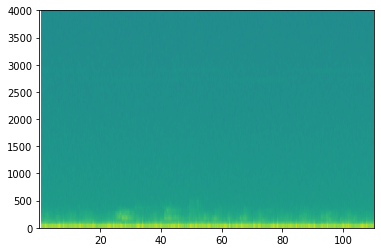

In [17]:
path = \
'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.wav'
x = graph_spectrogram(path)

In [26]:
x, sr = librosa.load(path, sr=2000)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(40000,) 2000


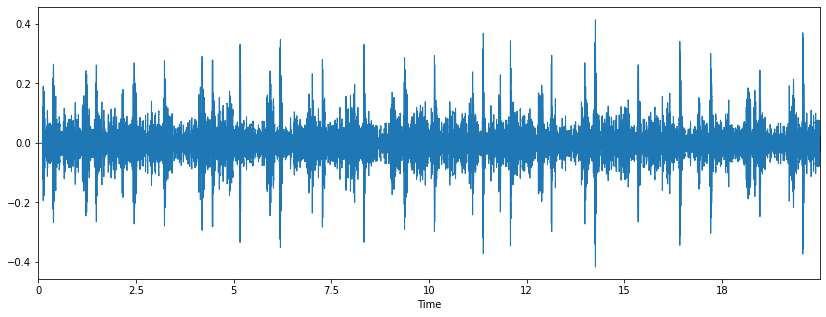

In [27]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

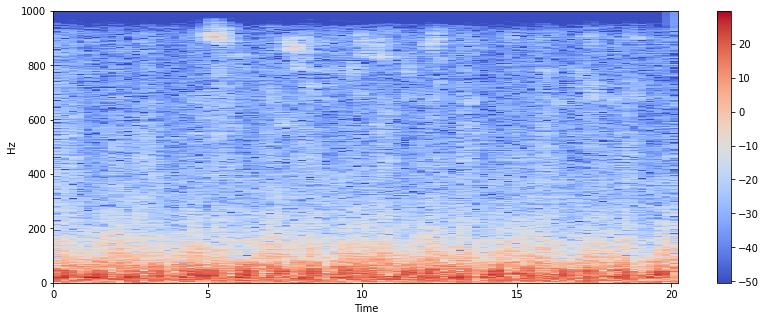

In [28]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one

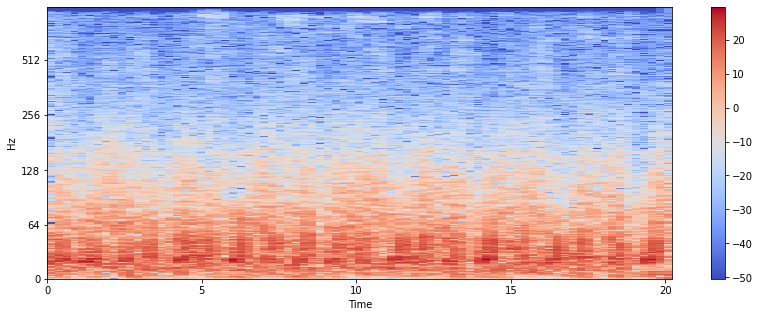

In [29]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [0]:

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [31]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(79,)

In [32]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

SyntaxError: ignored

In [0]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [0]:
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')